error x1 tensor(1.4518)
error x2 tensor(7256.7690)


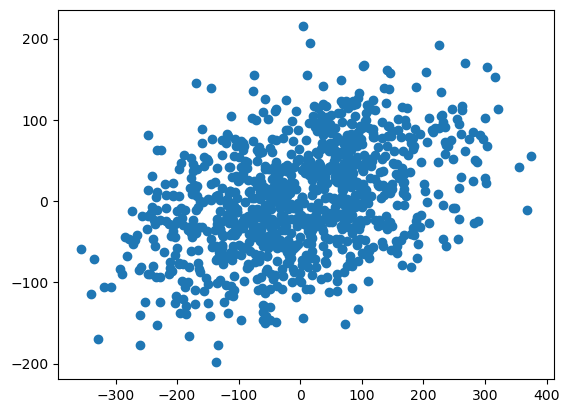

In [41]:
import matplotlib.pyplot as plt
import torch
import utils
def get_A_b():
    n = 1000
    rand_mat = torch.randn(n, n)
    A = rand_mat @ rand_mat.T  # This creates a symmetric PSD matrix
    A += utils.eye_like(A)*1e-4
    b = torch.randn(n)
    return A, b

A,b = get_A_b()
x1=utils.solve_linear_psd(A=A.clone(),b=b.clone(),method='solve')
norm = x1.norm()
print('error x1', (A@x1-b).norm() ) 

x2=utils.steihaug_toint_cg(A=A.clone(),b=b.clone(),trust_radius=norm ,tol=0,max_iter=100)
print('error x2', (A@x2-b).norm() ) 

plt.scatter(x1,x2)